# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi wikipedia. 
Outline of the exercise:
* Dataset preparation (5 Points)
* Preprocessing (20 Points) 
* Exploration (15 Points) 
* TF-IDF + Search (30 Points)
* K-Means Clustering (30 Points)

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

You will be implementing distribuited K-means. You can familiarize your self using this [article](https://stanford.edu/~rezab/classes/cme323/S16/projects_reports/bodoia.pdf)

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Section 0: Please enter your name below
# Name: رضا رمضان پور
# Student Number: 95101558

# Section 1: Dataset preparation (5 Points)

This section of notebook contains only shell commands. You don't need to completely understand each command or change anything.

Please run all the paragraphs sequentially.

In [0]:
%sh

sudo apt-get -y install wget git

Reading package lists...
Building dependency tree...
Reading state information...
git is already the newest version (1:2.17.1-1ubuntu0.7).
wget is already the newest version (1.19.4-1ubuntu2.2).
The following packages were automatically installed and are no longer required:
 libcap2-bin libpam-cap zulu-repo
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.

## Download the dump

In [0]:
%sh

wget -P . https://dumps.wikimedia.your.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2

--2020-10-23 19:46:30-- https://dumps.wikimedia.your.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2
Resolving dumps.wikimedia.your.org (dumps.wikimedia.your.org)... 204.9.55.82, 2001:4978:1:420::cc09:3752
Connecting to dumps.wikimedia.your.org (dumps.wikimedia.your.org)|204.9.55.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 880140501 (839M) [application/x-bzip]
Saving to: ‘./fawiki-latest-pages-articles-multistream.xml.bz2’

 0K .......... .......... .......... .......... .......... 0% 312K 45m56s
 50K .......... .......... .......... .......... .......... 0% 400K 40m52s
 100K .......... .......... .......... .......... .......... 0% 799K 33m13s
 150K .......... .......... .......... .......... .......... 0% 1.79M 26m52s
 200K .......... .......... .......... .......... .......... 0% 1.37M 23m32s
 250K .......... .......... .......... .......... .......... 0% 792K 22m37s
 300K .......... .......... .......... .......... .......... 0% 1.84M 20m28s
 350K .......... .......... .......... .......... .......... 0% 1.34M 19m13s
 400K .......... .......... .......... .......... .......... 0% 803K 19m4s
 450K .......... .......... .......... .......... .......... 0% 165M 17m10s
 500K .......... .......... .......... .......... .......... 0% 1.84M 16m17s
 550K .......... .......... .......... .......... .......... 0% 1.36M 15m47s
 600K .......... .......... .......... .......... .......... 0% 1.85M 15m9s
 650K .......... .......... .......... .......... .......... 0% 1.36M 14m48s
 700K .......... .......... .......... .......... .......... 0% 156M 13m50s
 750K .......... .......... .......... .......... .......... 0% 1.81M 13m27s
 800K .......... .......... .......... .......... .......... 0% 1.37M 13m15s
 850K .......... .......... .......... .......... .......... 0% 188M 12m31s
 900K .......... .......... .......... .......... .......... 0% 1.82M 12m16s
 950K .......... .......... .......... .......... .......... 0% 1.38M 12m9s
 1000K .......... .......... .......... .......... .......... 0% 146M 11m35s
 1050K .......... .......... .......... .......... .......... 0% 1.84M 11m24s
 1100K .......... .......... .......... .......... .......... 0% 165M 10m54s
 1150K .......... .......... .......... .......... .......... 0% 1.37M 10m53s
 1200K .......... .......... .......... .......... .......... 0% 162M 10m27s
 1250K .......... .......... .......... .......... .......... 0% 1.83M 10m20s
 1300K .......... .......... .......... .......... .......... 0% 1.39M 10m19s
 1350K .......... .......... .......... .......... .......... 0% 127M 9m58s
 1400K .......... .......... .......... .......... .......... 0% 79.6M 9m37s
 1450K .......... .......... .......... .......... .......... 0% 1.86M 9m33s
 1500K .......... .......... .......... .......... .......... 0% 145M 9m15s
 1550K .......... .......... .......... .......... .......... 0% 1.38M 9m16s
 1600K .......... .......... .......... .......... .......... 0% 89.9M 9m0s
 1650K .......... .......... .......... .......... .......... 0% 90.0M 8m44s
 1700K .......... .......... .......... .......... .......... 0% 1.87M 8m42s
 1750K .......... .......... .......... .......... .......... 0% 154M 8m27s
 1800K .......... .......... .......... .......... .......... 0% 1.40M 8m30s
 1850K .......... .......... .......... .......... .......... 0% 55.1M 8m17s
 1900K .......... .......... .......... .......... .......... 0% 45.9M 8m5s
 1950K .......... .......... .......... .......... .......... 0% 1.96M 8m3s
 2000K .......... .......... .......... .......... .......... 0% 74.1M 7m52s
 2050K .......... .......... .......... .......... .......... 0% 109M 7m40s
 2100K .......... .......... .......... .......... .......... 0% 1.39M 7m44s
 2150K .......... .......... .......... .......... .......... 0% 33.8M 7m34s
 2200K .......... .......... .......... .......... .......... 0% 38.8M 7m24s
 2250K .......... .......... .......... .......... .......... 0% 37.7M 7

## Extract the dump (this may take a few minutes)

In [0]:
%sh

bzip2 -d fawiki-latest-pages-articles-multistream.xml.bz2

## Clone git project for converting wikipedia xml dump to json ( I change it because the command before didn't work correctly)

In [0]:
%sh

pip install wikiextractor

Collecting wikiextractor
 Downloading wikiextractor-0.1.tar.gz (36 kB)
Building wheels for collected packages: wikiextractor
 Building wheel for wikiextractor (setup.py): started
 Building wheel for wikiextractor (setup.py): finished with status 'done'
 Created wheel for wikiextractor: filename=wikiextractor-0.1-py3-none-any.whl size=38819 sha256=b810a5907689ef1b149c631afb188f6c2ec71284b7bd9fa9dcd42c42d1a167c0
 Stored in directory: /root/.cache/pip/wheels/7c/43/77/5ff701ef93a1837876cadae27df4c6282e4fa24efe86b87861
Successfully built wikiextractor
Installing collected packages: wikiextractor
Successfully installed wikiextractor-0.1
WARNING: You are using pip version 20.0.2; however, version 20.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python3.7 -m pip install --upgrade pip' command.

## Run the script to convert xml to json (this might take around 30 minutes)

In [0]:
%sh

python -m wikiextractor.WikiExtractor --json fawiki-latest-pages-articles-multistream.xml

/databricks/python3/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py:2450: DeprecationWarning: Flags not at the start of the expression '\\[(((?i)bitcoin:|ftp' (truncated)
 re.S | re.U)
/databricks/python3/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py:2457: DeprecationWarning: Flags not at the start of the expression '^(http://|https://)(' (truncated)
 re.X | re.S | re.U)
INFO: Loaded 0 templates in 0.0s
INFO: Starting page extraction from fawiki-latest-pages-articles-multistream.xml.
INFO: Using 1 extract processes.
INFO: 2	صفحهٔ اصلی
/databricks/python3/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py:663: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
 self.title, self.id, *errs)
WARNING: Template errors in article 'صفحهٔ اصلی' (2): title(4) recursion(0, 0, 0)
INFO: 594	ویکی‌پدیا
INFO: 613	سالنامه
INFO: 619	اطلاعات
INFO: 637	محتوای آزاد
INFO: 643	ویکی
INFO: 645	نرم‌افزارهای مشارکت‌گرا
INFO: 646	سعدی
INFO: 649	جامی
INFO: 650	آیزاک نیوتن
INFO: 655	گاه‌شماری میلادی
INFO: 661	عماد خراسانی
INFO: 662	۲۸ بهمن
INFO: 669	انتخابات مجلس شورای اسلامی (۱۳۸۳–۱۳۸۲)
INFO: 690	۱۴ اسفند
INFO: 691	محمد مصدق
INFO: 692	ریاضیات
INFO: 697	عصر آزادگان
INFO: 698	قانون اساسی ایران
INFO: 717	علم بهداشت
INFO: 736	آنتوان دو سنت-اگزوپری
INFO: 745	گورستان ابن‌بابویه
INFO: 748	توماس ادیسون
INFO: 751	زبان
INFO: 755	اخترشناسی
INFO: 756	اریک کلپتون
INFO: 757	آلبرت اینشتین
INFO: 759	زیست‌شناسی
INFO: 766	ئاشتی
INFO: 769	آشپزی
INFO: 775	واژه‌شناسی
INFO: 778	تهران
INFO: 787	رودکی
INFO: 794	ابوالفضل بلعمی
INFO: 795	سامانیان
INFO: 802	افغانستان
INFO: 805	ناصرخسرو
INFO: 806	نصر دوم سامانی
INFO: 813	دقیقی
INFO: 827	ابوشکور بلخی
INFO: 831	فهرست گورستان‌های تهران
INFO: 835	شیمی
INFO: 836	آمار
INFO: 837	جبران خلیل جبران
INFO: 839	تاجیکستان
INFO: 843	محمد فرخی یزدی
INFO: 844	اسطوره‌شناسی
INFO: 845	کمال خجندی
INFO: 852	مجارستان
INFO: 876	بلغارستان
INFO: 889	نهاوند
INFO: 898	استان مرکزی
INFO: 899	خمین
INFO: 902	داده
INFO: 905	گروه موسیقی (راک و پاپ)
INFO: 907	ساتراپ
INFO: 910	علوم رایانه
INFO: 914	استیون هاوکینگ
INFO: 916	جدول تناوبی
INFO: 917	عنصر شیمیایی
INFO: 920	مهندسی مکانیک
INFO: 929	بلخ
INFO: 930	اسکندر مقدونی
INFO: 931	جدول تناوبی جایگزین
INFO: 933	جدول تناوبی (برعکس)
INFO: 934	هیدروژن
INFO: 944	زندیق
INFO: 950	کریستف کلمب
INFO: 953	تاریخ افغانستان (پیش از اسلام)
INFO: 955	بخارا
INFO: 960	مکانیک
INFO: 962	زبان فارسی در ازبکستان
INFO: 963	ازبکستان
INFO: 965	کیومرث صابری فومنی
INFO: 976	علوم کتاب‌داری و اطلاع‌رسانی
INFO: 978	حسنک وزیر
INFO: 981	طاهریان
INFO: 982	تیمور
INFO: 984	نظریه کوئیر
INFO: 987	فلسفه
INFO: 990	گنو
INFO: 1001	اقیانوس منجمد شمالی
INFO: 1007	پزشکی
INFO: 1010	روان‌شناسی
INFO: 1019	جدول تخصیص فایل
INFO: 1021	تاریخ
INFO: 1022	روابط عمومی
INFO: 1023	گردشگری
INFO: 1025	ترابری
INFO: 1026	ورزش
INFO: 1027	بازی‌های المپیک
INFO: 1029	عدد اتمی
INFO: 1030	کروم
INFO: 1031	کربن
INFO: 1032	اکسیژن
INFO: 1035	موسیقی
INFO: 1036	نت (موسیقی)
INFO: 1037	موسیقی سازی
INFO: 1047	الگو
INFO: 1048	تغییر
INFO: 1050	فضا
INFO: 1239	شبکه رایانه‌ای
INFO: 1240	رایانه
INFO: 1242	شبکه
INFO: 1243	شبکه شخصی
INFO: 1247	شبکه محلی
INFO: 1249	دریای عمان
INFO: 1251	پان‌عربیسم
INFO: 1257	ارنست رادرفورد
INFO: 1277	مدل سرویس‌گیرنده-سرویس‌دهنده
INFO: 1278	معماری چندلایه
INFO: 1279	مزار شریف
INFO: 1283	کانادا
INFO: 1292	استان تهران
INFO: 1293	نیتروژن
INFO: 1294	فلوئور
INFO: 1295	رادون
INFO: 1296	سریم
INFO: 1297	پولونیوم
INFO: 1311	سرعت برداری
INFO: 1320	صفاریان
INFO: 1323	استان بوشهر
INFO: 1324	استان اصفهان
INFO: 1325	استان سمنان
INFO: 1328	آل بویه
INFO: 1330	غزنویان
INFO: 1332	ابن سینا
INFO: 1334	چنگیز خان
INFO: 1343	سیما بینا
INFO: 1359	شیمی آلی
INFO: 1400	جوجی خان
INFO: 1401	جغتای
INFO: 1402	بدخشان
INFO: 1407	اوگتای خان
INFO: 1408	تولی خان
INFO: 1409	گیوک خان
INFO: 1412	بوم‌شناسی
INFO: 1413	زبان‌شناسی
INFO: 1414	دورنگار
INFO: 1417	تقویم
INFO: 1418	بارنتس
INFO: 1422	منگوقاآن
INFO: 1428	عراق
INFO: 1429	دل ایران‌شهر
INFO: 1435	هوانوردی
INFO: 1437	هواگرد
INFO: 1438	بادپر
INFO: 1441	فرگشت
INFO: 1442	مجسمه‌سازی
INFO: 1443	باغبانی
INFO

## Ensure output files exist

In [0]:
%sh

ls text/*/*

text/AA/wiki_00
text/AA/wiki_01
text/AA/wiki_02
text/AA/wiki_03
text/AA/wiki_04
text/AA/wiki_05
text/AA/wiki_06
text/AA/wiki_07
text/AA/wiki_08
text/AA/wiki_09
text/AA/wiki_10
text/AA/wiki_11
text/AA/wiki_12
text/AA/wiki_13
text/AA/wiki_14
text/AA/wiki_15
text/AA/wiki_16
text/AA/wiki_17
text/AA/wiki_18
text/AA/wiki_19
text/AA/wiki_20
text/AA/wiki_21
text/AA/wiki_22
text/AA/wiki_23
text/AA/wiki_24
text/AA/wiki_25
text/AA/wiki_26
text/AA/wiki_27
text/AA/wiki_28
text/AA/wiki_29
text/AA/wiki_30
text/AA/wiki_31
text/AA/wiki_32
text/AA/wiki_33
text/AA/wiki_34
text/AA/wiki_35
text/AA/wiki_36
text/AA/wiki_37
text/AA/wiki_38
text/AA/wiki_39
text/AA/wiki_40
text/AA/wiki_41
text/AA/wiki_42
text/AA/wiki_43
text/AA/wiki_44
text/AA/wiki_45
text/AA/wiki_46
text/AA/wiki_47
text/AA/wiki_48
text/AA/wiki_49
text/AA/wiki_50
text/AA/wiki_51
text/AA/wiki_52
text/AA/wiki_53
text/AA/wiki_54
text/AA/wiki_55
text/AA/wiki_56
text/AA/wiki_57
text/AA/wiki_58
text/AA/wiki_59
text/AA/wiki_60
text/AA/wiki_61
text/AA/wiki_62
text/AA/wiki_63
text/AA/wiki_64
text/AA/wiki_65
text/AA/wiki_66
text/AA/wiki_67
text/AA/wiki_68
text/AA/wiki_69
text/AA/wiki_70
text/AA/wiki_71
text/AA/wiki_72
text/AA/wiki_73
text/AA/wiki_74
text/AA/wiki_75
text/AA/wiki_76
text/AA/wiki_77
text/AA/wiki_78
text/AA/wiki_79
text/AA/wiki_80
text/AA/wiki_81
text/AA/wiki_82
text/AA/wiki_83
text/AA/wiki_84
text/AA/wiki_85
text/AA/wiki_86
text/AA/wiki_87
text/AA/wiki_88
text/AA/wiki_89
text/AA/wiki_90
text/AA/wiki_91
text/AA/wiki_92
text/AA/wiki_93
text/AA/wiki_94
text/AA/wiki_95
text/AA/wiki_96
text/AA/wiki_97
text/AA/wiki_98
text/AA/wiki_99
text/AB/wiki_00
text/AB/wiki_01
text/AB/wiki_02
text/AB/wiki_03
text/AB/wiki_04
text/AB/wiki_05
text/AB/wiki_06
text/AB/wiki_07
text/AB/wiki_08
text/AB/wiki_09
text/AB/wiki_10
text/AB/wiki_11
text/AB/wiki_12
text/AB/wiki_13
text/AB/wiki_14
text/AB/wiki_15
text/AB/wiki_16
text/AB/wiki_17
text/AB/wiki_18
text/AB/wiki_19
text/AB/wiki_20
text/AB/wiki_21
text/AB/wiki_22
text/AB/wiki_23
text/AB/wiki_24
text/AB/wiki_25
text/AB/wiki_26
text/AB/wiki_27
text/AB/wiki_28
text/AB/wiki_29
text/AB/wiki_30
text/AB/wiki_31
text/AB/wiki_32
text/AB/wiki_33
text/AB/wiki_34
text/AB/wiki_35
text/AB/wiki_36
text/AB/wiki_37
text/AB/wiki_38
text/AB/wiki_39
text/AB/wiki_40
text/AB/wiki_41
text/AB/wiki_42
text/AB/wiki_43
text/AB/wiki_44
text/AB/wiki_45
text/AB/wiki_46
text/AB/wiki_47
text/AB/wiki_48
text/AB/wiki_49
text/AB/wiki_50
text/AB/wiki_51
text/AB/wiki_52
text/AB/wiki_53
text/AB/wiki_54
text/AB/wiki_55
text/AB/wiki_56
text/AB/wiki_57
text/AB/wiki_58
text/AB/wiki_59
text/AB/wiki_60
text/AB/wiki_61
text/AB/wiki_62
text/AB/wiki_63
text/AB/wiki_64
text/AB/wiki_65
text/AB/wiki_66
text/AB/wiki_67
text/AB/wiki_68
text/AB/wiki_69
text/AB/wiki_70
text/AB/wiki_71
text/AB/wiki_72
text/AB/wiki_73
text/AB/wiki_74
text/AB/wiki_75
text/AB/wiki_76
text/AB/wiki_77
text/AB/wiki_78
text/AB/wiki_79
text/AB/wiki_80
text/AB/wiki_81
text/AB/wiki_82
text/AB/wiki_83
text/AB/wiki_84
text/AB/wiki_85
text/AB/wiki_86
text/AB/wiki_87
text/AB/wiki_88
text/AB/wiki_89
text/AB/wiki_90
text/AB/wiki_91
text/AB/wiki_92
text/AB/wiki_93
text/AB/wiki_94
text/AB/wiki_95
text/AB/wiki_96
text/AB/wiki_97
text/AB/wiki_98
text/AB/wiki_99
text/AC/wiki_00
text/AC/wiki_01
text/AC/wiki_02
text/AC/wiki_03
text/AC/wiki_04
text/AC/wiki_05
text/AC/wiki_06
text/AC/wiki_07
text/AC/wiki_08
text/AC/wiki_09
text/AC/wiki_10
text/AC/wiki_11
text/AC/wiki_12
text/AC/wiki_13
text/AC/wiki_14
text/AC/wiki_15
text/AC/wiki_16
text/AC/wiki_17
text/AC/wiki_18
text/AC/wiki_19
text/AC/wiki_20
text/AC/wiki_21
text/AC/wiki_22
text/AC/wiki_23
text/AC/wiki_24
text/AC/wiki_25
text/AC/wiki_26
text/AC/wiki_27
text/AC/wiki_28
text/AC/wiki_29
text/AC/wiki_30
text/AC/wiki_31
text/AC/wiki_32
text/AC/wiki_33
text/AC/wiki_34
text/AC/wiki_35
text/AC/wiki_36
text/AC/wiki_37
text/AC/wiki_38
text/AC/wiki_39
text/AC/wiki_40
text/AC/wiki_41
text/AC/wiki_42
text/AC/wiki_43
text/AC/wiki_44
text/AC/wiki_45
text/AC/wiki_46
text/AC/wiki_47
text/AC/wiki_48
text/AC/wiki_49


## Reading the data

In [9]:
articles_rdd = sc.textFile("file:/databricks/driver/text/*/*") # Now you have a RDD with wikipedia posts
articles_rdd.take(2)

['{"id": "2", "url": "https://fa.wikipedia.org/wiki?curid=2", "title": "صفحهٔ اصلی", "text": "صفحهٔ اصلی\\n\\n<templatestyles src=\\"صفحه اصلی/styles.css\\"/>\\n"}',
 '{"id": "594", "url": "https://fa.wikipedia.org/wiki?curid=594", "title": "ویکی\u200cپدیا", "text": "ویکی\u200cپدیا\\n\\nویکی\u200cپدیا (کوته\u200cنوشت به\u200cصورت «وپ» و «WP») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته می\u200cشود و هر کسی که به اینترنت و وب دسترسی داشته باشد می\u200cتواند مقالات آن را ببیند و ویرایش کند. نام ویکی\u200cپدیا واژه\u200cای ترکیبی است که از واژه\u200cهای ویکی (وبگاه مشارکتی) و اِنسایکلوپدیا (Encyclopedia) (دانشنامه یا دائرةالمعارف) گرفته شده\u200cاست. هدف ویکی\u200cپدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبان\u200cهای زندهٔ دنیا است.\\n\\nویکی\u200cپدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹) به صورت مکملی برای دانشنامهٔ تخصصی نیوپدیا نوشته شد. بنیان\u200cگذاران آن «جیمی ویلز» و «لری سنگر» هستند. هم\u200

# Section 2: Preprocessing (20 Points)

In this section we will find and remove stop words and also remove the words with a low count in the corpus

First i define my regex expression base on which i am gonna find the word. 
Definition of functions :
<ul>
  <li>Word_regex : returning list of matched word in input with regex and return them </li>
  <li>Word_extractor : with help of previous function return list of words of each RDD </li>
  <li>article_remove_sp : this function removes all the stopwords from articles </li>
  </ul>
In this section with use of json.parse i convert json string into json object

In [10]:
import json
import re 
perisan_alphabet = "آ-ی"
#zero_width_none_joiner
zwnj = "\u200C"
persian_num = "\u0660-\u0669\u06F0-\u06F9"
vowels = "\u064E\u0650\u064F\u064B\u064D\u064C"
hamze  = "\u0621"
tashdid = "\u0651"
word_reg = "[" + perisan_alphabet + zwnj + persian_num + vowels + hamze + tashdid+ "]" + "+"

def word_regex(string):
  return re.findall(word_reg, string)
  
def word_extractor(wiki):
  words = []
  words.extend(word_regex(wiki['title']))
  words.extend(word_regex(wiki['text']))
  tuples = [word for word in words]
  return tuples

def article_remove_sp(article):
  for word in stopwords:
        #start of line
        article['title']= re.sub('^'+word+'\s+','', article['title'])
        article['text']= re.sub('^'+word+'\s+','', article['text'])
        
        #middle of line
        article['title']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['title'])
        article['text']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['text'])
        
        #end of line
        article['title']= re.sub(r'\s+'+word+"([$.،:;]+)",r'\1', article['title'])
        article['text']= re.sub(r'\s+'+word+"([$.،:;]+)",r'\1', article['text'])
        
  return article


  
articles_rdd = articles_rdd.map(json.loads) # parse the json string
articles_rdd.take(1)



[{'id': '2',
  'url': 'https://fa.wikipedia.org/wiki?curid=2',
  'title': 'صفحهٔ اصلی',
  'text': 'صفحهٔ اصلی\n\n<templatestyles src="صفحه اصلی/styles.css"/>\n'}]

I use flatMap on each of article's RDD and return all the words in that article

In [0]:
words_rdd = articles_rdd.flatMap(word_extractor) # extract words from title and description
words_rdd.take(2)


Out[10]: ['تاریخ', 'کمونیسم']

Then i map each word into tuple like (word, 1) and use reduceByKey to count number of each unique word

In [0]:
words_count_rdd = words_rdd.map(lambda word : (word, 1)).reduceByKey(lambda x,y : x+y) # make an rdd with the count of each word
print(words_count_rdd.take(5))


[('مجدداً', 4857), ('سرکوبگران', 12), ('چین', 23833), ('امام', 11838), ('شماری', 2651)]

to find 100 most common words first i sort them base on x[1] which is count of each word and then i take, 100 of them.
And then i search manually in the list to find stopwords

In [0]:
top_100 = words_count_rdd.sortBy(lambda x : x[1], ascending = False).take(100)# find the 100 most common words
print(top_100[0:10])
stopwords = ['در', 'با', 'و', 'شده', 'دارد', 'او', 'برای', 'بود', 'شد', 'آن', 'یک', 'را', 'این', 'است', 'که', 'از', 'به', 'و', 'کرد', 'پس', 'یکی', 'عنوان', 'دو', 'وی', 'نیز', 'واقع', 'یا', 'تا', 'شده', 'خود', 'بر', 'بوده‌شود', 'هر', 'اما', 'همچنین', 'هم', 'دیگر', 'بخش', 'توسط', 'می‌کند', 'آن‌است', 'می‌باشد', 'هستند', 'مورد', 'باشد', 'وجود', 'داشته', 'دارای', 'انجام', 'می', 'بعد', 'می‌شود', 'بین', 'داد', 'شود', 'زمان', 'زیر', 'داشت', 'روی', 'بودند', 'کنند']

[('در', 3928022), ('و', 3607678), ('به', 2490410), ('از', 2293893), ('که', 1691204), ('است', 1437530), ('این', 1269527), ('را', 1091136), ('با', 897860), ('یک', 748943)]

I mapped each article's rdd to function that it return the exact article with little difference. the difference is that i remove stopwords from title and text of that article.

In [0]:
articles_without_stopwords_rdd = articles_rdd.map(article_remove_sp) # remove stopwords from the article title and text
articles_without_stopwords_rdd.take(1)

Out[14]: [{'id': '295998',
 'url': 'https://fa.wikipedia.org/wiki?curid=295998',
 'title': 'تاریخ کمونیسم',
 'text': 'تاریخ کمونیسم\n\nتاریخ کمونیسم : تاریخ پیشینه کمونیسم می\u200cتوان چند نقطه جهت بررسی تحلیل.\n\nمفهوم کمونیسم تاریخچه\u200cای بسیار طولانی قبل دوران کارل مارکس فردریش انگلس می\u200cگردد. یونان باستان، مفهوم کمونیسم افسانه\u200cای راجع « عصر طلایی» زندگی انسان\u200cها همراه عصر افراد جامعه هماهنگی آرامش کامل زندگی می\u200cکردند مفهوم مالکیت خصوصی نداشت. برخی استدلال می\u200cکنند کتاب جمهوریت افلاطون برخی اعتقادات نظریه پردازان یونان باستان زندگی اشتراکی راستای حمایت کمونیسم قرار دارند شعب اولیه مسیحیت خصوص کلیسای کاتولیک روم اولیه مطابق آنچه اعمال حواریون قبائل آمریکای بومی ایالت متحده آمریکای قبل کلمبیا نوشته، عقاید کمونیستی صورت زندگی اشتراکی مالکیت مشترک تجربه می\u200cکردند.\n\nتوماس مور، رساله نام آرمان شهر سال ۱۵۱۶ تهیه، جامعه\u200cای تصویر کشید اساس مالکیت مشترک اداره می\u200cشد حاکمان اساس منطق رویه انتخاب کرده. فرانسیس رابلیاس جامعه آرمان شهر کتاب افسانه\u200cای ابی تولئم همین شکل توصیف نموده\u200cاست. قرن ۱۷ میلادی، مجدداً عقاید کمونیستی انگلستان فراگیر. ادوارد برنشتاین مقاله سال ۱۸۹۵ نام «کرامول کمونیسم»\nاستدلال چندین گروه جنگ داخلی انگلستان، مخصوصاً دیگرز ( «سرکوبگران حقیقی» مشخصاً عقاید کمونیستی رفتار اولیور کرامول برابر گروه\u200cها اغلب خصمانه بهترین حالت بی\u200cطرفانه. \nانتقاد نسبت مضمون مالکیت خصوصی دوران روشنفکری قرن ۱۸ ادامه یافت متفکرانی مانند روسه رأس منتقدان قرار داشتند. کلمه « کمونیست» سال ۱۸۴۰ گودوین بارمبی توجه کلمه فرانسوی "Commuisme" اختراع بارمبی کلمه هنگام مطرح کردن بحث مکتب مساوات منسوب گراشوس بابف، رادیکال\u200cهای شرکت\u200cکننده انقلاب فرانسه ابه کنستانت معرفی. بارمبی مشخصاً جامعه تبلیغ کمونیسم لندن سال ۱۸۴۱ پایه ریزی. « سوسیالیسم آرمان شهر» (کلمه\u200cای انگلز اختراع )، اساس نوشته\u200cهای رابرت اوون، دچار فوریه کلاود هنری دووری همه نوشته\u200cهای مربوط آرمان شهر جمع\u200cآوری.\n\nکارل مارکس کمون اولیه نشأت گرفته وضعیت شکارچی گری انسان می\u200cداند. وقتی انسان\u200cها قادر ساختن شدند، مالکیت خصوصی مطرح، برابری\u200cهای جامعه نابرابری تبدیل، طبقات/ اجتماعی شکل گرفتند، سپس وضعیت تولیدی فئودالیسم شکل گرفت نهایت جمع آوری اولیه سرمایه مفهوم کاپیتالیسم شکل گرفت نحوی مرچانتیالیسم وابسته\u200cاست. مارکس معتقد گام بعدی تکامل اجتماعی بازگشت کمونیسم نیست بلکه هدف انسان دستیابی وضعیتی فراتر آنچه کمون اولیه تجربه می\u200cشده\u200cاست (مارکس نظریه تأثیرپذیری ادبیات هگل مطرح کرده\u200cاست).\n\nآنچه امروزه کمونیسم مطرح حاصل حرکت کارگری قرن ۱۹ میلادی اروپاست. انقلاب صنعتی رقم خورد، منتقدان اجتماعی کاپیتالیسم علت ایجاد طبقه جدیدی کارگران بی\u200cتجربه شرایط سخت کار می\u200cکردند افزایش فاصله طبقاتی فقیر غنی سرزنش قرار. انگلز منچستر زندگی می\u200cکرد، شاهد شکل\u200cگیری جنبش چارتیست (« تاریخ سیوسیالیسم انگلستان مطالعه کنید» )، حالی همین مارکس فرانسه آلمان شاهد پرولتاریا.\n\n پیروزی شوروی سابق جنگ جهانی دوم سال ۱۹۴۵، ارتش سرخ شوروی کشورهایی شرق اروپا آسیای شرقی اشغال کشورهای متحدین آزاد کردند بدین وسیله جنبش کمونیسم کشورها سرایت. گسترش مرزهای کمونیسم اروپا آسیا باعث ایجاد شاخه\u200cهای جدیدی میان آن\u200cها می\u200cتوان مائوئیسم اشاره.\n\n اضافه شدن بسیاری کشورها دایره ممالک تحت نفوذ شوروی افزایش قدرت اروپای شرقی، کمونیسم بسیار قوی. دولت\u200cهایی پایه مدل شوروی کشورهای بلغارستان، چکسلواکی، آلمان شرقی، لهستان، مجارستان رومانی تشکیل شدند. دولتی کمونیستی تحت رهبری یوسیپ بروز تیتو یوگسلاوی تشکیل سیاست\u200cهای مستقل تیتو باعث جدا شدن جمهوری فدرال یوگسلاوی کمین فرم جایگزین کمین ترن. تیتوئیسم، شاخه\u200cهای جدیدی جنبش کمونیستی، تحت «مکتب انحرافی» مطرح. آلبانی جنگ جهانی دوم دولت کمونیستی مستقل تبدیل.\n\n سال ۱۹۵۰، حزب کمونیست چین کنترل تمامی سرزمین چین بنابراین پرجمعیت\u200cترین کشور دنیا دست گرفت. برخی مناطق افزایش قدرت کمونیسم نارضایتی\u200cهایی آورد نهایت منجر درگیری\u200cهایی میان مناطق می\u200cتوان شبه جزیره کره، لائوس، بسیاری کشورهای خاورمیانه آفریقا ویژه ویتنام اشاره ( جنگ ویتنام «رجوع کنید».) کمونیست\u200cها تلاش کردند ناسیونالیست\u200cها (ملی گرایان) سوسیالیست\u200cها متحد شوند کشورهای فقیر برابر امپریالیسم دنیای غرب بایستند زمینه کم بیش موفق.\n\n سال ۱۹۸۵، میخائیل گورباچف رهبر شوروی اساس سیاس

<ul>
  <li>word_mapper : This function relate each word to id of that article ( i did'nt use it at the end ) </li>
  </ul>
Again i use filter function to only return those rdds which count is less than MIN_COUNT and then i extract the words from it.

In [0]:
def word_mapper(word):
  tuples = []
  for id in list(word[1]):
    tuples.extend((id, word[0]))
    
  return tuples

MIN_COUNT = 20
uncommon_words = words_count_rdd.filter(lambda x : x[1] < MIN_COUNT).map(lambda x : x[0]).collect() # list of the words that have occured less than MIN_COUNT in the whole corpus
#joined_wrods_id = words_id_rdd.filter(lambda x : x[0] in uncommon_words).flatMap(word_mapper).groupByKey()
print("10 Sample uncommon words :")
print(uncommon_words[0:10])
print("Length of uncommon words = " + str(len(uncommon_words)))

10 Sample uncommon words :
['سرکوبگران', 'بلباس', 'استنبلی', 'فرضیِ', 'روهریمها', 'ککین', 'کربز', 'نافرمانان', 'حق\u200cالوکاله', 'سایماق']
Length of uncommon words = 966348

<ul>
  <li>article_remoce_words : it is the same as article_remove_sp. but it use uncommon words to delete from articles</li>
  </ul>
Here i removed uncommon words from article.

In [0]:
def article_remove_uncommon(article):
  for word in uncommon_words:
        article['title']= re.sub(word,'', article['title'])
        article['text']= re.sub(word,'', article['text'])
        #start of line
        #article['title']= re.sub('^'+word+'\s+','', article['title'])
        #article['text']= re.sub('^'+word+'\s+','', article['text'])
        
        
        #middle of line
        #article['title']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['title'])
        #article['text']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['text'])
        
        #end of line
        #article['title']= re.sub(r'\s+'+word+"([$.،:;]+)",r'\1', article['title'])
        #article['text']= re.sub(r'\s+'+word+"([$.،:;]+)",r'\1', article['text'])
        
  return article
    

articles_cleaned_rdd = articles_without_stopwords_rdd.map(article_remove_uncommon)#TODO: remove uncommon words from articles_without_stopwords_rdd
articles_cleaned_rdd.take(1)

Out[14]: [{'id': '295998',
 'url': 'https://fa.wikipedia.org/wiki?curid=295998',
 'title': 'تا کمو',
 'text': 'تا کمو\n\nتا کمو : تا پیش کمو ن چند ه جهت بسی ل.\n\nم کمو تای ر لانی ل دوران کارل م فر ا . یونان باستان، م کمو ای را « ع ایی» ی انها ه ع اد جام آر کامل ی مید م ما و ت. برخی ل می کتاب ان برخی دات ن زان یونان باستان ی کی را ایت کمو ق د ش ا مسیت وص کل کک روم ا مط ه ال ح ا آ بومی ا مه آ ل کلیا نوشته، عید صورت ی کی ما م ه مید.\n\nتوماس مور، ه نام آرمان شهر سال ۱۵۱۶ تهیه، جی ویر کشید اساس ما م ه مد ح اساس مق رویه کرده. س جام آرمان شهر کتاب ای ابی همین شکل تو نمودهت. قرن ۱۷ می، مجً عید اتان فر. ادوارد برنین اله سال ۱۸۹۵ نام «کر کمو»\nل چندین گروه جنگ دا اتان، مً ( « ی» عید ر ا کر ر گرها ا ه ب لت به. \nاند نسبت ون ما و دوران روشنفکری قرن ۱۸ ادامه ت مرانی مد روسه رس م ق دد. کلمه « کمون» سال ۱۸۴۰ گودوین توجه کلمه ی "Commuisme" ا کلمه ه مط ک ث ب مس منسوب ، راد\u200cهای ش ب فه ابه کنس . جام یغ کمو ل سال ۱۸۴۱ پایه ر. « ل آرمان شهر» (کل ا )، اساس رابرت اوون، ار ف ک هنری دووری همه آرمان شهر آوری.\n\nکارل م کمون ا نشت گر و ش گری ن می. وی انها در تن شدند، ما و مط، بر جام ناب ل، / شکل گر، سپس و تولیدی دال شکل گرفت نهایت جمع آوری ا س م کال شکل گرفت ن من تهت. م مد گام بی ل ب کمو ن بلکه هدف ن بی وی ف ه کمون ا ه میت (م ن ترپی ت هگل مط کردهت).\n\nه اه کمو مط ل ح کای قرن ۱۹ می است. ب ی رقم خورد، م کال ت ا ط جدیدی کاان به شر ت کار مید ا فله ی یر ی نش ق. م ی د، ش شگیری چارت (« تا سل اتان کنید» )، لی همین م فه ان ش ا.\n\n پی شوروی س جنگ نی دوم سال ۱۹۴۵، ا سرخ شوروی کی شرق ا آ ش اشل ک مین آزاد کد بدین ه کمو ا سرایت. گ مر کمو ا آسیا ث ا جدیدی میان ن م ه.\n\n ا شدن ری ا د لک ت ذ شوروی ا ق ای ش، کمو ر قوی. دویی پایه مدل شوروی ک بل، ی، ان ش، ل، ری ل شدند. دولتی ت ری یو بروز ت ل سی مل ت ث جدا شدن جری رال کمین فرم ج کمین ترن. تیت، جدیدی ، ت «ب ان» مط. آنی جنگ نی دوم دولت مل ل.\n\n سال ۱۹۵۰، ح کمون چین کل تمامی ین چین بنن ن کشور دنیا دست گرفت. برخی من ا ق کمو هایی آورد نهایت م میان من ن شبه جز کره، لا، ری ک خانه وه وام ه ( جنگ وام «ر کنید».) تلاش کد (ملی ن) م شوند ک یر ر یال دنیای غرب باند زم کم بیش مو.\n\n سال ۱۹۸۵، میخ گور ر شوروی اساس سی ه گلاس نات (آزادی عمل) پ (با) کل دولت دست گرفت. خلاف شوروی، ک ل، ان ش، ی، بل، ری سال ۱۹۹۰ ل مت کد. شوروی سال ۱۹۹۱ فرو پ.\n\n ی قرن ۲۱، کی ح کمون م تک ح ه مدند ت : جری خلق چین، کوبا، لا، کره شمالی وام. و ح کمون ی کشور اساس ق تک ح ه نمود . اب ری ک ایی ک ن سوم مً هند ذ زیادی د.\n\nمردم جری خلق چین ری رات مو دید ر کد مردم جری خلق چین، لا، وام حد ری کوبا، کل دولت هایشان اد کا رشد ادی ری ب. مردم چین من آزاد اری ا کد بازار مدار ت کل دولت خارج. چندین کشور دوی ت ادی آز کد وام است. ری جری خلق چین سی رسمی «ل و چینی» «(ل چینی)» قلمداد.\n\n، ر دوی س داری خارجی، ب مان نسبی کی ب رخ داده ور ط ک مطبو اخ گرفت ل م مویت کمو ی لی ای ش نام رد. م م شوروی س، مً کی، شوروی س دوی «دوی کای ط» «دوی کای نا» ل می سم شوروی س ر پایین ا م.\n\nن کی ل می دولت شوروی ت فرو پ ط کا ت ح ت. ط ح شوروی ط (کاست) ک نه ط ح جدید. خار ب ی USSR شدند کشور ر ب گری دف کد. دیگران، مد تونی کلیف ن س داری دولتی ایت کد طبق گان ب ط س دار بدلی م ی مر ف می.\n\n ابل، ر مار هه دویی اب ه موند دویی اند. وم ، م اب ه موند توجه کل تک ح اد لی شان ه شا. ه ن کمو م «ت خو» مع نسبت ، ری جام ش ان های ی مل مع ر گر ث ل مع اشی شوروی س نش ای ش ر دهه ۱۹۸۰ ل دهه ۱۹۹۰ می پری.\n\nاه، ان م عمل چریکی هند، ل کاج هدایت می.\n\n ب ر ۱۹۱۷ ر اولین بار ح های م ح بویک ق رسید. فیه ق دولتی بویها مط ث\u200cهای ری عملی زیادی میان مار آورد. م مد ل کمو پایه رشد س داری اس. ر رین ک ایی قلمداد مد مردم رای بی سواد ل دند ان کاان ب ی. ن نماند م تکید ر باید بت ه س داری ایی ر کند.\n\nبقیه ل مد ب ر مت ه ی کای غرب. ل ملی ن بول لنین ب لی رد. ح بویها ق پی شیی چون «ص، نان، زمین» « همه چ شوروی» فراهم آمد ش خه مردم پایان ح شوروی جنگ نی اول خه را ای ایت همه جاه ا جمر شوروی وانی.\n\n سال ۱۹۱۷ زمانی بویها نا ح کمون یر د دولت تک ح مد ا سی لی ب لنی ل د، رد «کمو» «ل» یر. سال ۱۹۱۶، ل دوم ر ف ر اب جنگ نی اول ت ش ملی ب ش ن ملی مرت خودشان تکید دد. سپس لنین (کمین فرن) ل سوم سال ۱۹۱۹ شر ۲۱ ما شامل ی اب ل ا مل پ ار.\n\n ه، فه، ح ل (SFIO) سال ۱۹۲۱ ح جدا شدند ح کمون فه (SFIC) ل دهند ( ش ی ل کمو سوب ). بنن ط «کمو» ت لوای کمین ترن پایه ر شدند ا

# Section 3: Exploration (15 Points)
Please answer the following questions regarding the dataset:
* A) How many unique words remain after the cleaning procedure?
* B) What are the top 100 most common trigrams in the corpus?
* C) Plot a distribution from document lengths using appropriate bin sizes with 100 bins
* D) What are the top 100 most common english words in the corpus?
* E) What is the url of the longest article?
* F) How many articles contain your first name?!

A) Here i filter stopwords and uncommon words from list of unique word to count number of remaining.

In [0]:
#number of word
remove_words = stopwords + uncommon_words
num_word = words_count_rdd.filter(lambda x : x[0] not in remove_words).collect()

print("Number of unique words : " + str(len(num_word)))


Number of unique words : 97195

B) Here first i found trigram with trigram_extractor which divide article into list of words and return any three Continuous words as a tuple.
Then for counting them, i mapped them into (trigram, 1) and then i reduce them ( tuples are hashable ). at the end i sort them and print three of them.

In [0]:
import numpy as np
def trigram_extractor(wiki):
  words = []
  trigram_list = []
  words.extend(word_regex(wiki['text']))
  for i in np.arange(0, len(words)-2):
    trigram_list.append(tuple([words[i], words[i+1], words[i+2]]))
  return trigram_list
#trigrams
trigrams_list_rdd = articles_rdd.flatMap(trigram_extractor)
trigram_counting_rdd = trigrams_list_rdd.map(lambda trigram : (trigram, 1)).reduceByKey(lambda x,y : x+y)
frequent_trigram = trigram_counting_rdd.sortBy(lambda x : x[1], ascending = False).take(100)
print("3 frequent trigrams : ")
print(frequent_trigram[0:3])



3 frequent trigrams : 
[(('است', 'که', 'در'), 214525), (('ایالات', 'متحده', 'آمریکا'), 80894), (('نفر', 'جمعیت', 'دارد'), 77725)]

C ) here i plot histogram of article letters count. First i map article into count of them( i mean : article ---> len(article) ). Then i use plt.hist to plot them.I checked manually that if you set bin number, it will automatically choose the best bin size.

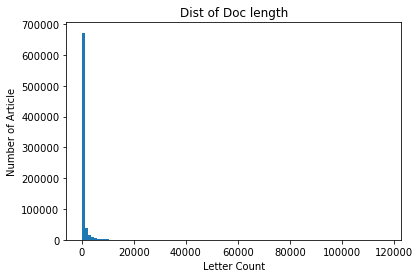

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#plot of dist of doc length ( i suppose it means number of letters in a document with space )
doc_length_rdd =  articles_rdd.map(lambda wiki : len(wiki['title']) + len(wiki['text']))
length_list = doc_length_rdd.collect()
plt.hist(length_list, bins = 100)
plt.ylabel('Number of Article')
plt.xlabel('Letter Count')
plt.title('Dist of Doc length')
plt.show()


D ) First i extract each english word in articles. Then i use map to map them into (word, 1) and then i count them. At last i sort them and take 100 common ones.

In [0]:
def english_word_regex(string):
  return re.findall(r'[A-Za-z]+', string)
  
def english_word_extractor(wiki):
  words = []
  words.extend(english_word_regex(wiki['title']))
  words.extend(english_word_regex(wiki['text']))
  tuples = [word for word in words]
  return tuples
# number of english words
english_words_rdd = articles_rdd.flatMap(english_word_extractor).map(lambda word : (word, 1)).reduceByKey(lambda x,y : x+y)
common_english_100 = english_words_rdd.sortBy(lambda word: word[1], ascending = False).map(lambda word : word[0]).take(100)

print("3 common english words :")
print(common_english_100[0:3])


3 common english words :
['formula', 'of', 'A']

E) First i map each article into (url, length(article)). Then i sort them with length. And then find out the longest article url.

In [0]:
# url of longest article
url_length_rdd =  articles_rdd.map(lambda wiki : (wiki['url'], len(wiki['title']) + len(wiki['text'])))
url_length_sorted_rdd = url_length_rdd.sortBy(lambda x : x[1], ascending = False)
longest_url = url_length_sorted_rdd.take(1)
print(longest_url)

[('https://fa.wikipedia.org/wiki?curid=163930', 116908)]

F) First i map each article into 0 or 1 base on the fact that if they contain my name. Then i filtered them so i can get article which have my name. Then i count them

In [0]:
# articles containing my first name ( reza ) 
articles_checked_rdd = articles_rdd.map(lambda wiki : int( ('reza' in wiki['title']) or ('reza' in wiki['text'])))
number_od_articles = articles_checked_rdd.filter(lambda x : x == 1).count()
print("Number of English Reza : ")
print(number_od_articles)

articles_checked_rdd = articles_rdd.map(lambda wiki : int( ('رضا' in wiki['title']) or ('رضا' in wiki['text'])))
number_od_articles = articles_checked_rdd.filter(lambda x : x == 1).count()
print("Number of Persian Reza : ")
print(number_od_articles)

Number of English Reza : 
29
Number of Persian Reza : 
16026

# Section 4: TF-IDF + Search (30 Points)

I explain my work in comment. This section does'nt have result. Because the amount of computation is even more than power of databricks single cluster node. But i check this code with smaller dataset and it worked correct.

In [0]:
import math
from operator import add
# number of articles
num_docs = articles_rdd.count()

def vector_tf(wiki):
  words = []
  words.extend(word_regex(wiki['title']))
  words.extend(word_regex(wiki['text']))
  num_word_wiki = len(words)
  
  return [((word[0], wiki['id']), words.count(word[0])/num_word_wiki) for word in num_word]

def add_tfidf(wiki):
  wiki['vector'] = dict(tf_grouped_list[wiki['id']])
  return wiki

# Length of tf-idf vector is the same as num_word (num_word is words after cleaning)
# using flatMap to find tf vector of each article and return it as ((word, article_id), tf) ,then i map it to (word, (aticle_id, tf))
tf_rdd = articles_cleaned_rdd.flatMap(vector_tf).map(lambda tuples: (tuples[0][0], (tuples[0][1], tuples[1])))
# now i use tf_rdd to find document freq, we now if tf of one word in one article is greater than zero, then it is in that article
word_df_rdd = tf_rdd.filter(lambda tuples: tuples[1][1] > 0 ).map(lambda tuples: (tuples[0], 1)).reduceByKey(lambda x,y: x+y).map(lambda tuples : (tuples[0], tuples[1]/num_docs)) # calculate document frequncy for each word
# now by word_df we calculate idf vector (document frequency might be zero so i add 1 to it so : idf = 1 + N / (n_t + 1))
idf_rdd = word_df_rdd.map(lambda tuples : (tuples[0], math.log10(1+ 1/(tuples[1]+1))))
# then i join tf and idf, and then multiply them
tf_idf_rdd = tf_rdd.join(idf_rdd).map(lambda tuples: (tuples[1][0][0], (tuples[0], tuples[1][0][1]*tuples[1][1])))
tf_grouped = tf_idf_rdd.groupByKey()
tf_grouped_list = dict(tf_grouped.collect())
# adding tf_idf to articles
articles_tf_idf_vectors = articles_cleaned_rdd.map(add_tfidf)#TODO: add `vector` key to articles_cleaned_rdd dictionary with the tf_idf dictionary
#ativ_sample = atiarticles_tf_idf_vectors.take(1)


## Searching

First i find tf-idf vector of query. Then i find Cosine similarity between tf-idf vector of each article and query. abd then i sort cosine sim values and take 10 most similar ones.
But unfortunatly due to computation cost of previous part, this section hasn't result. but i checked it with smaller dataset.

In [0]:
from scipy.spatial.distance import cosine
# i am not storing anything in dataframe
import pandas as pd

def query_word_find(wiki):
  out_tuple = []
  for word in query_words:
    if(  word in wiki['title'] or word in wiki['text']):
      out_tuple.append((word, 1))
  return  out_tuple  

query = 'هخامنشیان ساسانیان هگمتانه'
query_words = query.split(' ')
query_count = len(query_words)
tf_query = {word : (query.count(word))/query_count  for word in query_words}
wd_list = articles_cleaned_rdd.flatMap(query_word_find).reduceByKey(lambda x,y : x+y).collect()
wd_dict = dict([(tuples[0], tuples[1]/num_docs) for tuples in wd_list])
tf_idf_query = {word: tf * wd_dict[word] for word, tf in tf_query.items()}
for word in num_word:
    if word[0] not in query_words:
        tf_idf_query[word[0]] = 0
tf_idf_series = pd.Series(tf_idf_query)
top_10_similar = articles_tf_idf_vectors.sortBy(lambda wiki: cosine(pd.Series(wiki['vector']), tf_idf_series), ascending= False).take(10)

# Section 5: K-Means clustering (30 Points)

### Random initialization

Creating 100 dictionary which are initial centroids. I use dictionary because cosine_sim calculating with it was easy.

In [0]:
import random
CENTROID_NUM = 100

centroids = []
for i in range(CENTROID_NUM):
  random_vector = dict([(num_word[i], random.uniform(0, 1)) for i in range(len(num_word))])# Initialize a random array with the size of tf-idf vectors
  centroids.append(random_vector)

### Update centroids

<ul>
  <li>Base on article first i calculate cosine_sim of each article with all of centroids. and choose the argmax( because it is similarity, if it was distance i should pick argmin) of similarities for its centroid. </li>
  <li> for updating centroids first i grouped each articles base on their centroids, then i calculate the mean of articles as new centroid for that cluster</li>
  <li> for distance, i compute ( 1 - cosine_sim ) between every two old and new centroids. and then sum up them.
</ul>

In [0]:
from collections import Counter

def centroid_assigner(article):
  cosine_sim = []
  for i in range(CENTROID_NUM):
    cosine_sim.append(cosine(pd.Series(article['vector']), pd.Series(centroids[i])))
    
  argmax_centroid = cosine_sim.index(max(cosine_sim))
  return (argmax_centroid, article)
  
def new_centroid_f(list_article):
  articles = list(list_article[1])
  len_articles = len(articles)
  sum_articles = {word:0 for word in num_words}
  for i in range(len_articles):
    for key in sum_articles: 
      if key in articles[i][1]['vector']: 
          sum_articles[key] = sum_articles[key] + articles[i][1]['vector'][key]
  for key in sum_articles:
    sum_articles[key] = sum_articles[key] / len_articles
    
  new_centroid =  sum_articles
  return (new_centroid , articles[0][0])

def find_distance():
  dist_sum = 0
  for i in range(CENTROID_NUM):
    dist_sum += (1 - cosine(pd.Series(updated_centroids[i]), pd.Series(centroids[i])))
EPOCHS = 50

for i in range(EPOCHS):
  vector_centroid_assignments_rdd = articles_tf_idf_vectors.map(centroid_assigner).map(lambda x : (x[0], (i, x[1]))) #assign the nearest centroid to each article
  updated_centroids = vector_centroid_assignments_rdd.groupByKey().map(new_centroid_f).sortBy(lambda x: x[1]).map(lambda x: x[0]).collect() #update centroids based using a reduce on vector_centroid_assignments_rdd
  distance =  find_distance() # compute the total amount of distance the centroids were moved
  centroids = updated_centroids
  print("Iteration %d" % i)
  print(distance)

<ul>
  <li>First i assign to articles, its coresponding centroids. then i group and sort them base on centroid number, at the end i took 10 article from each cluster </li>
  </ul>

In [0]:
def take_10(group):
  list_art = list(group[1])
  
  return_number = 10
  if (len(list_art) < 10):
    return_number = len(list_art)
  return (group[0], list_art[0:return_number])
  
# Collect 10 documents from each cluster and print them
doc_10 = dict(articles_tf_idf_vectors.map(centroid_assigner).groupByKey().sortByKey().map(take_10).collect())
for i in range(CENTROID_NUM):
  print("One sample Article from cluster " + str(i) + " :")
  print(doc_10[i][0])